# Descomposición del IMAE por componentes


**Nota** Para ejecutar este cuaderno se requiere el paquete `bccr`. Si no lo tiene, ejecute la siguiente celda 

In [1]:
try:
    import bccr
except ImportError:
    print('Module bccr missing. Installing it now')
    !pip install bccr

## Gráfico del IMAE

In [2]:
from bccr import SW
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.filters.hp_filter import hpfilter

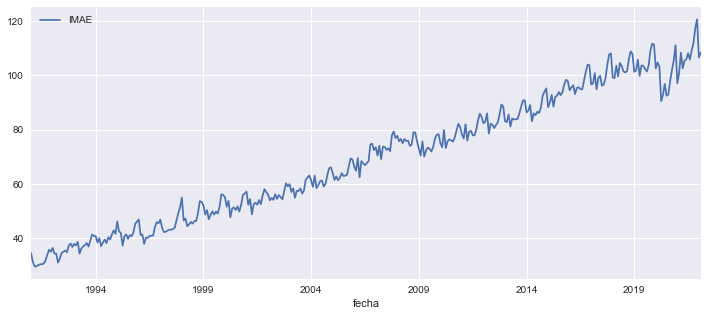

In [3]:
#imae = SW(IMAE=35449)  # serie anterior, no datos desde 2020-11
imae = SW(IMAE=87703)  # nueva serie
imae.plot(figsize=[12,5]);

## Componentes del IMAE

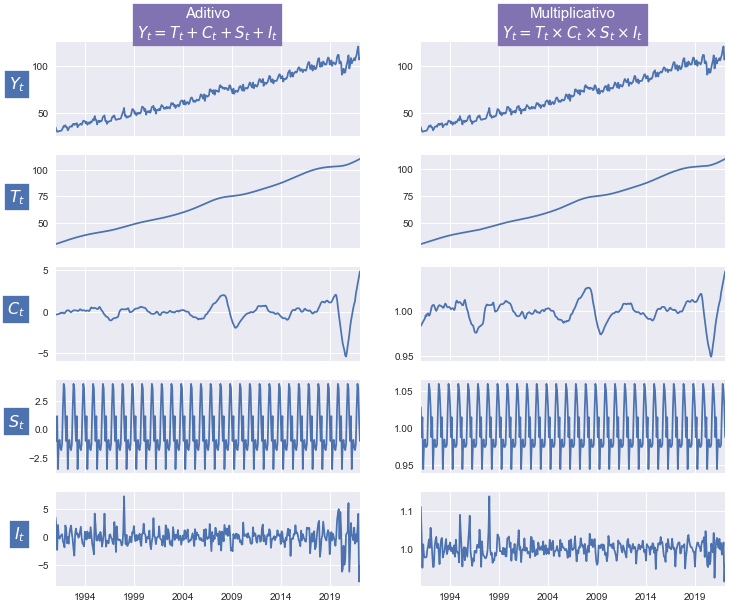

In [4]:
componentes = ['Serie\noriginal', 'Tendencia','Ciclo','Componente\nestacional','Componente\nirregular']

res = seasonal_decompose(imae, model='additive', period=12, extrapolate_trend='freq')
ciclo, tendencia = hpfilter(res.trend, lamb=14400)
additive = pd.concat([res.observed,tendencia, ciclo, res.seasonal, res.resid], axis=1)
additive.columns = componentes

res = seasonal_decompose(imae, model='multiplicative', period=12, extrapolate_trend='freq')
ciclo, tendencia = hpfilter(np.log(res.trend), lamb=14400)
multiplicative = pd.concat([res.observed, np.exp(tendencia), np.exp(ciclo), res.seasonal, res.resid], axis=1)
multiplicative.columns = componentes

descomp = pd.concat([additive, multiplicative], keys=['aditiva', 'multiplicativa'], axis=1)
descomp.index.name = ""
fig, axs = plt.subplots(5,2, figsize=[12,10], sharex=True)

for comp, ax in zip('YTCSI', axs[:,0]):
    ax.annotate(f'${comp}_t$',(-0.1,0.5), xycoords='axes fraction', ha='right', fontsize=16, color='white',backgroundcolor='C0')


for ((metodo, comp), serie), ax in zip(descomp.iteritems(), axs.T.flatten()):
    serie.plot(ax=ax)

for metodo, ax in zip(['Aditivo\n$Y_t = T_t + C_t + S_t + I_t$', 'Multiplicativo\n$Y_t = T_t \\times C_t \\times S_t \\times I_t$'], axs[0]):
    ax.annotate(metodo,(0.5,1.05), xycoords='axes fraction', ha='center', fontsize=15, color='white',backgroundcolor='C3')